# **Import Library**

In [24]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px
import glob
from scipy import stats

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [25]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [46]:
df = pd.read_csv('train_prototipe.csv')

# Replace the values in the 'Late' column
df['Late'] = df['Late'].replace({-1: 0, 0: 1})

df.sample(10)


,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late,Weight_category_encoded,Reorder_purchases
908,0.0,0.256098,1.0,0,2.500000,-0.648809,1.0,0.000000,0.0
5271,1.5,0.353659,1.0,1,-0.166667,-0.868089,1.0,-0.666667,0.0
7496,0.5,0.280488,2.0,0,-1.000000,-0.817007,0.0,-0.666667,0.0
7159,-0.5,-0.451220,1.0,1,-0.666667,-0.934745,0.0,-0.666667,0.0
2504,-1.0,-0.292683,5.0,1,4.333333,-0.218346,1.0,0.000000,0.0
6299,0.5,0.536585,2.0,1,0.000000,-0.725744,0.0,-0.666667,0.0
8083,0.0,-0.475610,0.0,0,-0.166667,0.140477,1.0,0.666667,0.0
5459,0.0,-0.829268,0.0,0,0.500000,0.515808,0.0,1.333333,0.0
5093,0.5,0.280488,1.0,0,0.166667,0.399626,0.0,1.333333,0.0
4560,1.0,0.804878,1.0,1,-0.333333,-0.846597,0.0,-0.666667,0.0


# **Stage 3**

## **Modelling**

### **Function**

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model):
    y_pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [65]:
def plot_feature_importances(model, x_train, model_name):
    import pandas as pd
    import matplotlib.pyplot as plt

    # DataFrame dengan tingkat kepentingan fitur
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    })

    # Reset index DataFrame
    feature_importances = feature_importances.reset_index(drop=True)

    # Group by
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]

    # Plot
    plt.figure(figsize=(6, 3))
    fi.plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top Feature Importances - {model_name}')
    plt.show()

# Contoh pemanggilan
# plot_feature_importances(best_model_xgb, x_train, 'XGBRegressor')


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

#contoh pemanggilan
#eval_regression(regressor)

In [75]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    # Evaluation Metrics
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

   
    # Cross-validation
    score = cross_validate(model, x_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('\nRecall (Cross-validation Train): %.2f' % score['train_score'].mean())
    print('Recall (Cross-validation Test): %.2f' % score['test_score'].mean())
    
    # Confusion Matrix
    print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred))

def show_best_hyperparameter(model):
    if hasattr(model, 'best_estimator_'):
        print(model.best_estimator_.get_params())
    else:
        print("The model is not a GridSearchCV or RandomizedSearchCV instance.")

# Example usage
# Assuming x_train, x_test, y_train, y_test are already defined
#model = RandomForestClassifier(random_state=42)
#model.fit(x_train, y_train.values.ravel())

#eval_classification(model, x_train, y_train, x_test, y_test)
#show_feature_importance(model, x_train)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    # Generate predictions
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1'], 
                yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def draw_learning_curve(model_type, param_values):
    if model_type == 'LogisticRegression':
        model = LogisticRegression()
    elif model_type == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_type == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_type == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_type == 'SVC':
        model = SVC(probability=True)
    else:
        raise ValueError("Invalid model type. Supported types are 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', and 'SVC'.")

    train_scores = []
    test_scores = []

    for param_value in param_values:
        if model_type == 'LogisticRegression':
            model.set_params(C=param_value)
        elif model_type == 'KNeighborsClassifier':
            model.set_params(n_neighbors=param_value)
        elif model_type == 'DecisionTreeClassifier':
            model.set_params(max_depth=param_value)
        elif model_type == 'RandomForestClassifier':
            model.set_params(n_estimators=param_value)
        elif model_type == 'SVC':
            model.set_params(C=param_value)

        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(param_value) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter Value')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Tuning - ' + model_type)
    plt.legend()
    plt.show()

#contoh pemanggilan
#param_values_rf = [50, 100, 150, 200]
#draw_learning_curve('RandomForestClassifier', param_values_rf)

#param_values_svc = [0.1, 1, 10]
#draw_learning_curve('SVC', param_values_svc)


### **Split Dataset**

In [47]:
x = df.drop(columns=['Late'])
y = df[['Late']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

train_ratio = len(x_train) / len(x)
test_ratio = len(x_test) / len(x)

print(f"Training set ratio: {train_ratio:.2f}")
print(f"Test set ratio: {test_ratio:.2f}")


x_train shape: (7699, 8)
x_test shape: (3300, 8)
y_train shape: (7699, 1)
y_test shape: (3300, 1)
Training set ratio: 0.70
Test set ratio: 0.30


### **XGB Regressor**

### **Decision Tree**

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.71
F1-Score (Test Set): 0.71
ROC AUC (Test Set): 0.64
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.70

Confusion Matrix (Test Set):
 [[ 740  572]
 [ 567 1421]]

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.57      0.56      0.57      1312
         1.0       0.71      0.71      0.71      1988

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



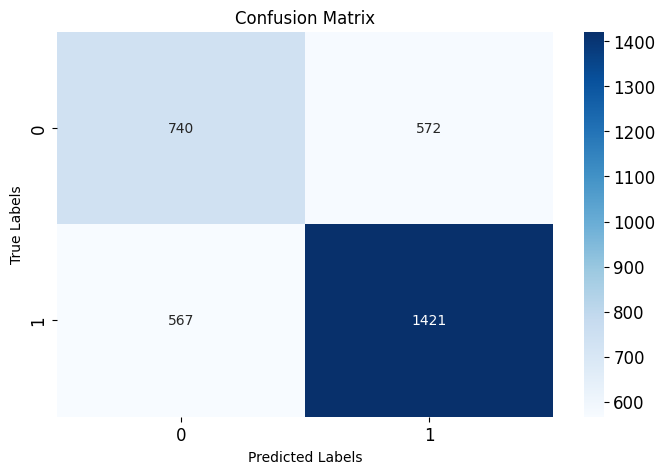

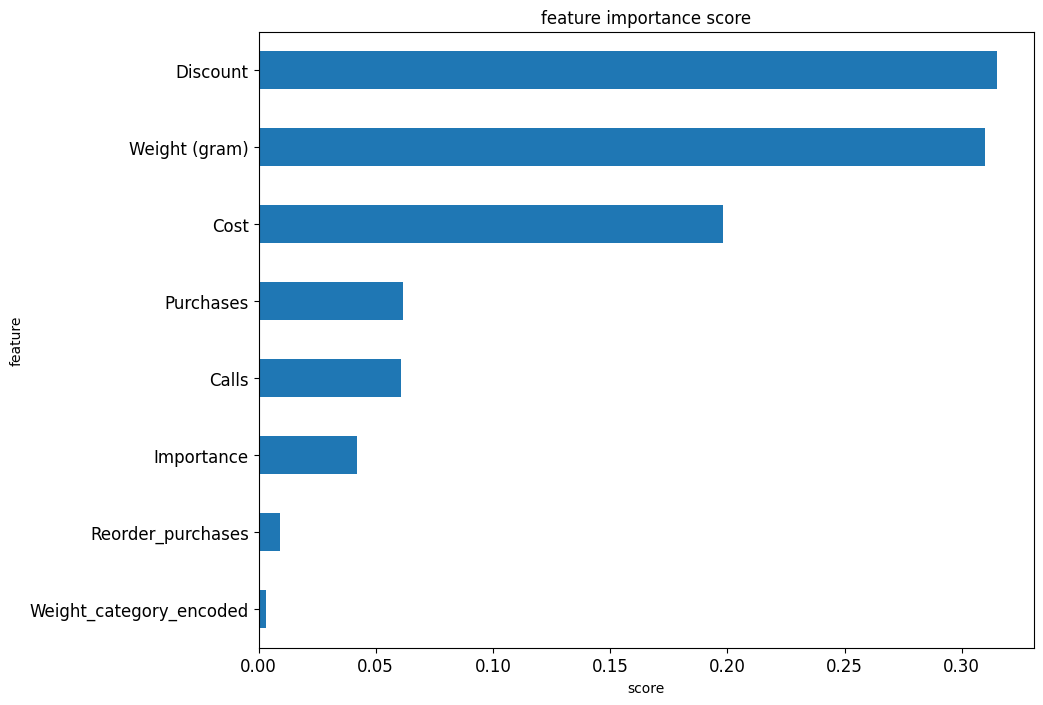

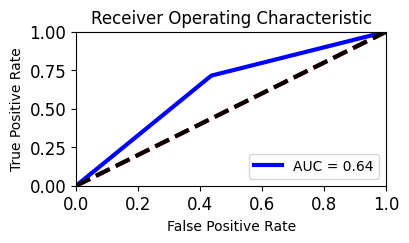

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)
plot_confusion_matrix(dt)
show_feature_importance(dt)
plot_roc(dt)